In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Numpy, pandas, seaborn and matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [3]:
#set mode to none to remove SettingsWIthCopywarinng
pd.options.mode.chained_assignment = None
#set it to covert scientific noations sunch as 4.225108e+11 to 422510842796.00
pd.options.display.float_format='{:.4f}'.format
#to display all the columns
pd.set_option('display.max_columns',100)
#to determine the way float numbers and numpy objects are displayed
np.set_printoptions(suppress = True,formatter={'float_kind':'{:f}'.format})

In [4]:
#Loading Loan datasets
#code to importing the CSV file
loan=pd.read_csv('loan.csv',encoding='ISO-8859-1')

In [5]:
#code for inspecting loan dataset
loan.dtypes
loan.shape
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,nan,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,

In [6]:
#check for duplicate values
loan.duplicated().sum()

0

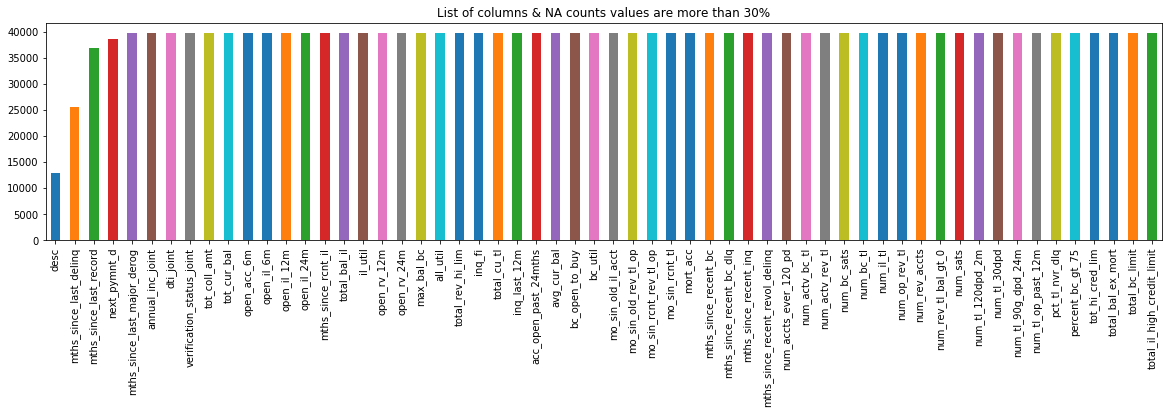

In [7]:
#code to plot list of columns which have NA count more then 30%
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of columns & NA counts values are more than 30%')
plt.show()

In [37]:
#user defined function to remove NA values from the dataset
def removeNulls(dataframe,axis =1, percent=0.3):
    '''
    *removeNull function will remove the rows and columns based on parameters provided.
    *dataframe : Name of the dataframe
    *axis : Axis= 0 defines drop rows,axis =1 (default) defines drop columns
    *percent :percent of data where column/rows are null.default is 0.3(30%)
    '''
    df =dataframe.copy()
    ishape =df.shape
    if axis ==0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace =True)
        print("\nNumber of rows dropped\t:" ,len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels= colnames,axis=1,inplace= True)
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\n Mew dataset rows,columns",df.shape)
    
    return df

In [38]:
#Pass values to user defined function to remove NA values in columns
loan = removeNulls(loan, axis=1, percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 98) 
 Mew dataset rows,columns (39717, 40)


In [39]:
#Pass values to user defined function to remove NA values in rows
loan = removeNulls(loan, axis=0, percent = 0.3)


Number of rows dropped	: 0

Old dataset rows,columns (39717, 40) 
 Mew dataset rows,columns (39717, 40)


In [40]:
#to find the unique elements in loan dataframe
unique = loan.nunique()
unique = unique[unique.values ==1]

In [41]:
#To drop with unique columns
loan.drop(labels = list(unique.index),axis=1,inplace=True)
print("so now we have ",loan.shape,"rows & columns.")

so now we have  (39717, 40) rows & columns.


In [42]:
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [43]:
#To remove no requried columns
not_requried_columns=["id","member_id","url","zip_code"]
loan.drop(labels= not_requried_columns,axis =1, inplace=True)
print("so now we have ",loan.shape,"rows & columns.")

KeyError: "['id' 'member_id' 'url' 'zip_code'] not found in axis"

In [44]:
loan['int_rate'] = loan['int_rate'].map(lambda x: str(x)[:-1])
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.6,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.2,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.9,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.4,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.6,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,other,Personal,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,May-16,0.0000


In [45]:
numeric_columns =['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan[numeric_columns]= loan[numeric_columns].apply(pd.to_numeric)

In [46]:
loan.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39714,5000,5000,1325.0000,36 months,8.0000,156.8400,A,A4,NaN,< 1 year,MORTGAGE,100000.0000,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.3000,0,Oct-98,0,11,0,9698,19.40%,20,0.0000,0.0000,5272.1611,1397.1200,5000.0000,272.1600,0.0000,0.0000,0.0000,Apr-08,0.0000,Jun-07,nan
39715,5000,5000,650.0000,36 months,7.4000,155.3800,A,A2,NaN,< 1 year,MORTGAGE,200000.0000,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.7200,0,Nov-88,0,17,0,85607,0.70%,26,0.0000,0.0000,5174.1986,672.6600,5000.0000,174.2000,0.0000,0.0000,0.0000,Jan-08,0.0000,Jun-07,nan
39716,7500,7500,800.0000,36 months,13.7000,255.4300,E,E2,Evergreen Center,< 1 year,OWN,22000.0000,Not Verified,Jun-07,Fully Paid,debt_consolidation,Consolidation Loan,MA,14.2900,1,Oct-03,0,7,0,4175,51.50%,8,0.0000,0.0000,9195.2633,980.8300,7500.0000,1695.2600,0.0000,0.0000,0.0000,Jun-10,256.5900,Jun-10,nan


In [47]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation   46.9346
credit_card          12.9164
other                10.0536
home_improvement      7.4930
major_purchase        5.5065
small_business        4.6026
car                   3.9001
wedding               2.3844
medical               1.7448
moving                1.4679
vacation              0.9593
house                 0.9593
educational           0.8183
renewable_energy      0.2593
Name: purpose, dtype: float64

In [48]:
del_loan_purpose=(loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose= del_loan_purpose[(del_loan_purpose <0.75) |(del_loan_purpose.index == 'other')]
loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

print(loan.purpose.unique())

So now we are left with (35621, 40) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


In [49]:
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid    83.1953
Charged Off   13.9665
Current        2.8382
Name: loan_status, dtype: float64

In [53]:
#To drop rows values on loan_status which is less the 1.5
del_loan_status = (loan.loan_status.value_counts()*100)/len(loan)
del_loan_status = del_loan_status[(del_loan_status<1.5)]

loan.drop(labels= loan[loan.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("so now we have",loan.shape,"rows & columns.")
print(loan.loan_status.unique())

so now we have (35621, 40) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


In [54]:
loan['loan_income_ratio']=loan['loan_amnt']/loan['annual_inc']

In [56]:
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-',1).str
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [58]:
months_order =["jan","Feb","Mar","Apr","May","jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month']=pd.Categorical(loan['issue_month'],categories=months_order,ordered=True)

In [63]:
bins=[0, 5000, 10000, 15000, 20000, 25000, 40000]
slot = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'],bins,labels=slot)

In [66]:
bins=[0, 25000, 50000, 75000, 100000, 1000000]
slot =['0-25000','25000-50000','50000-75000','75000-100000','10000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'],bins,labels=slot)

In [121]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [69]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

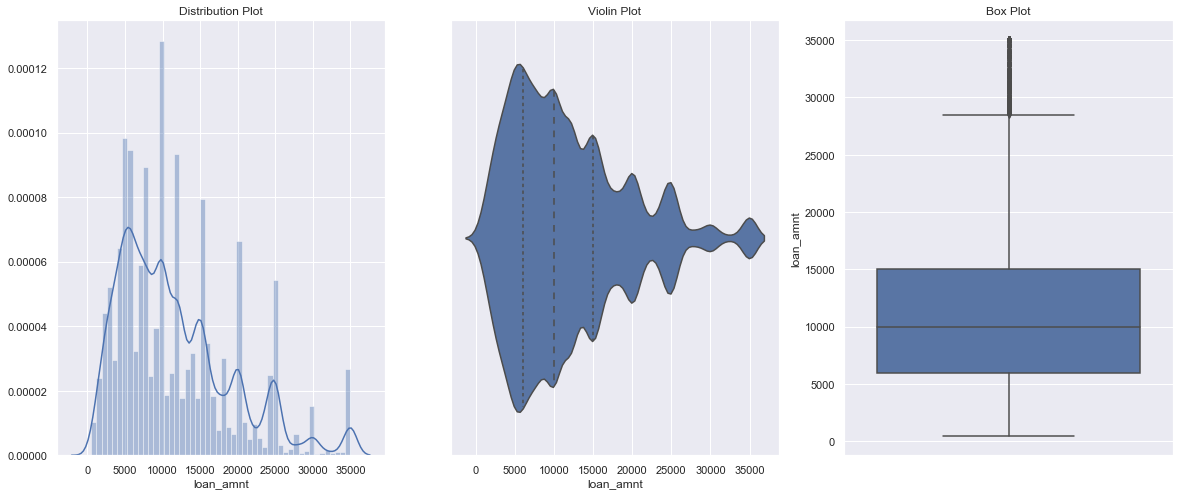

In [70]:
univariate(df=loan,col='loan_amnt',vartype=0)

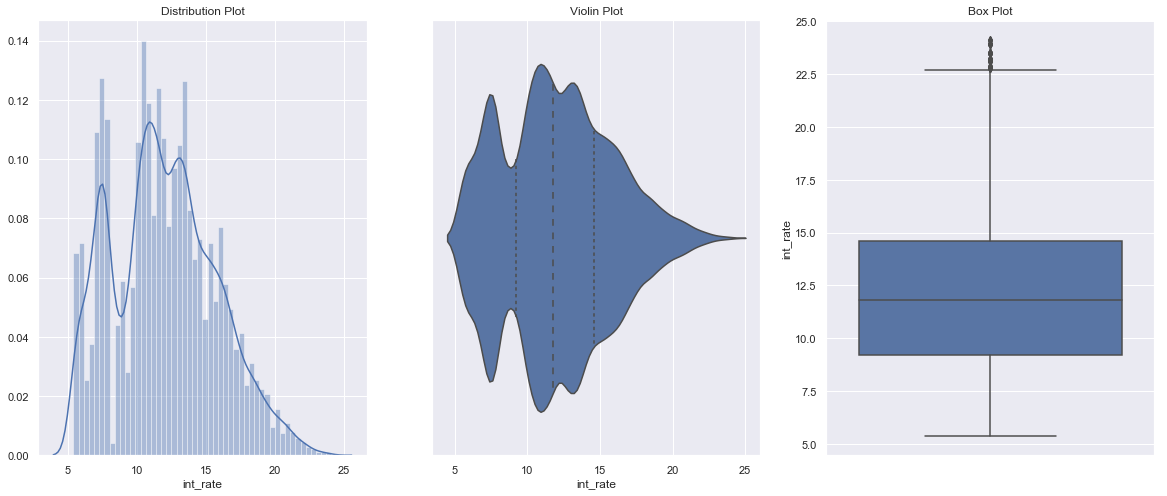

In [72]:
univariate(df=loan,col='int_rate',vartype=0)

In [73]:
loan["annual_inc"].describe()

count     35621.0000
mean      69596.8782
std       65009.9829
min        4000.0000
25%       41600.0000
50%       60000.0000
75%       83004.0000
max     6000000.0000
Name: annual_inc, dtype: float64

In [74]:
q = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"]<q]
loan["annual_inc"].describe()

count    35417.0000
mean     66946.7615
std      37318.4688
min       4000.0000
25%      41325.0000
50%      60000.0000
75%      82140.0000
max     294000.0000
Name: annual_inc, dtype: float64

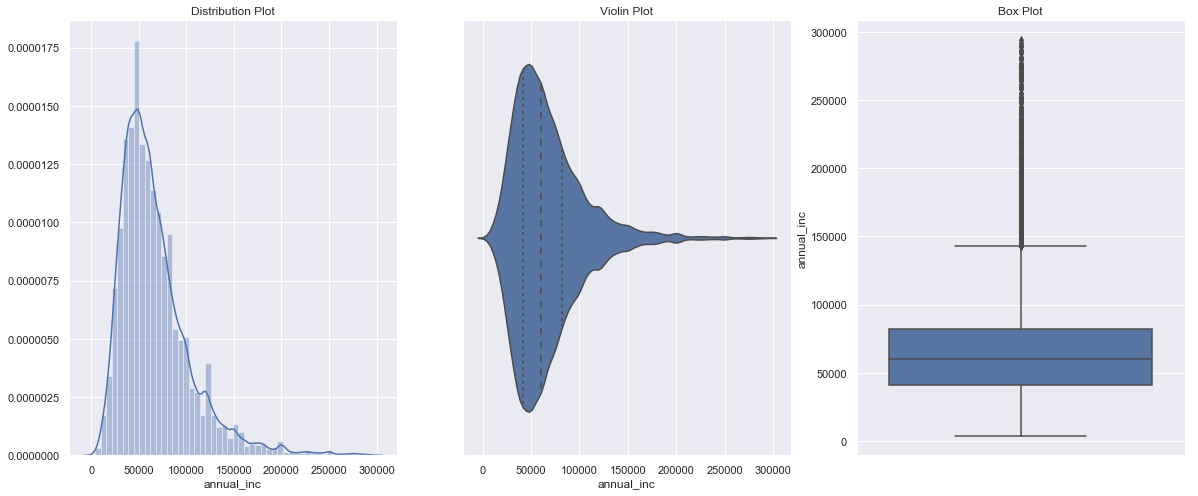

In [75]:
univariate(df=loan,col='annual_inc',vartype=0)

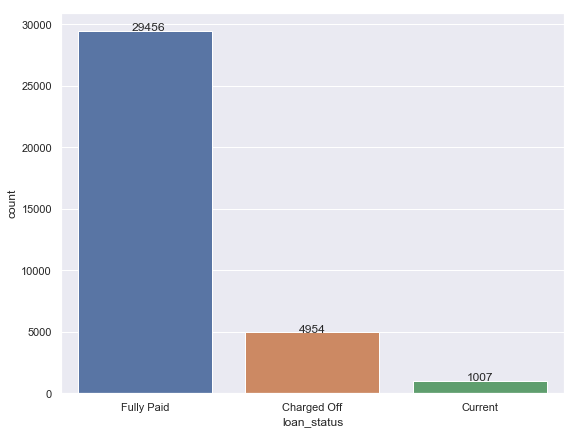

In [76]:
univariate(df=loan,col='loan_status',vartype=1)

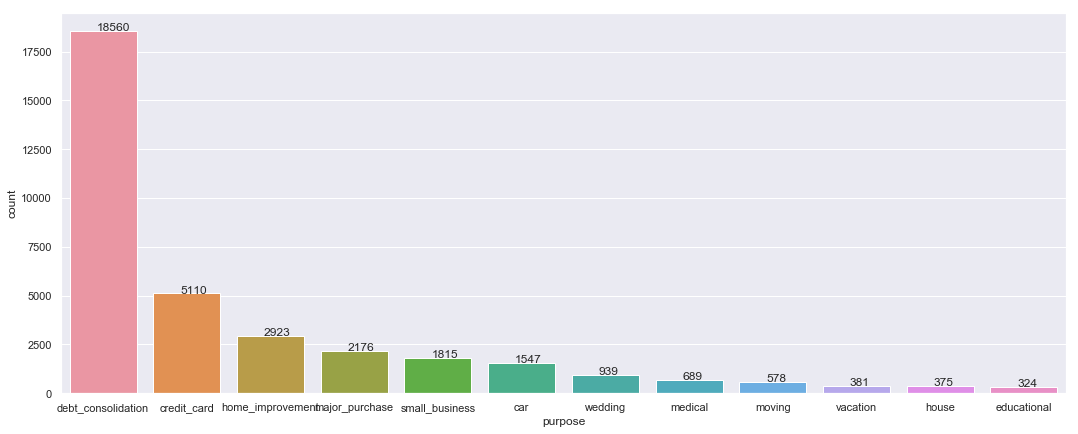

In [78]:
univariate(df=loan,col='purpose',vartype=1)

In [79]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [81]:
rem=['OTHER','NONE','ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

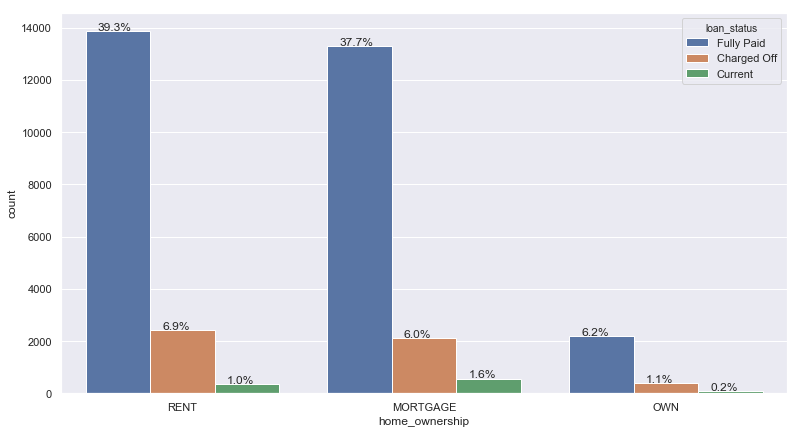

In [82]:
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

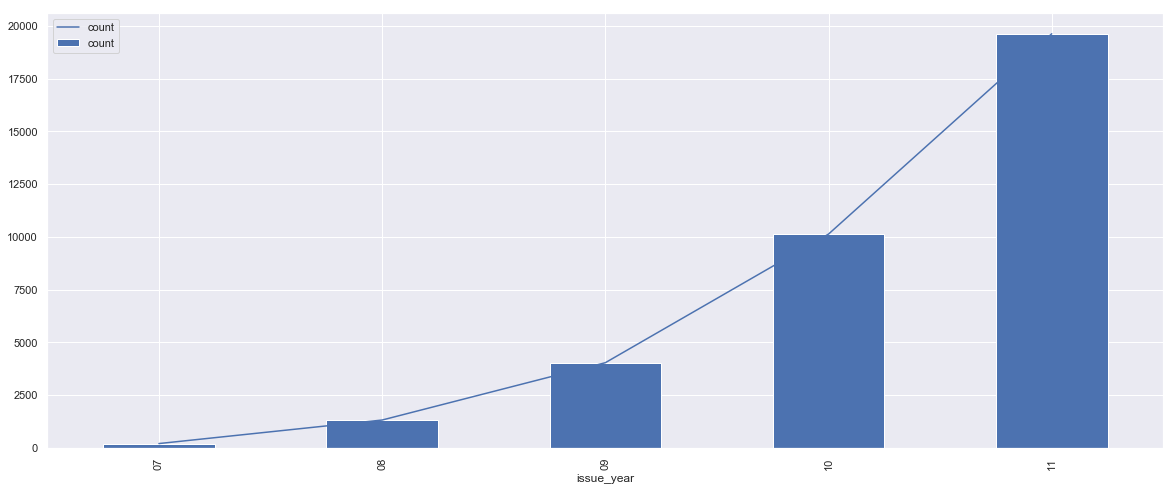

In [84]:
year_wise=loan.groupby(by=[loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status":"count"},inplace=True)
ax=year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax=ax)
plt.show()

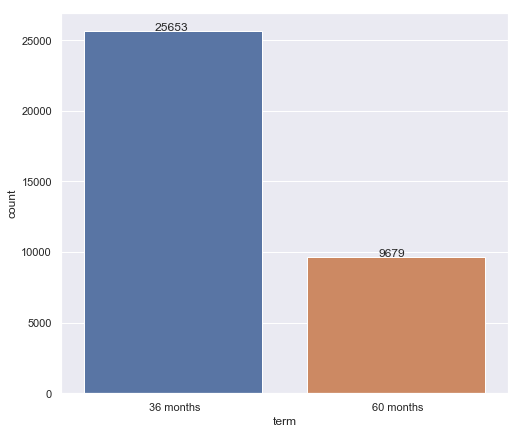

In [91]:
univariate(df=loan,col='term',vartype=1)

In [87]:
loan.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_income_ratio,issue_month,issue_year,loan_amnt_range,annual_inc_range,int_rate_range
0,5000,5000,4975.0000,36 months,10.6000,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000,0.2083,Dec,11,0-5000,0-25000,0-7.5
1,2500,2500,2500.0000,60 months,15.2000,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000,0.0833,Dec,11,0-5000,25000-50000,0-7.5
2,2400,2400,2400.0000,36 months,15.9000,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000,0.1959,Dec,11,0-5000,0-25000,0-7.5


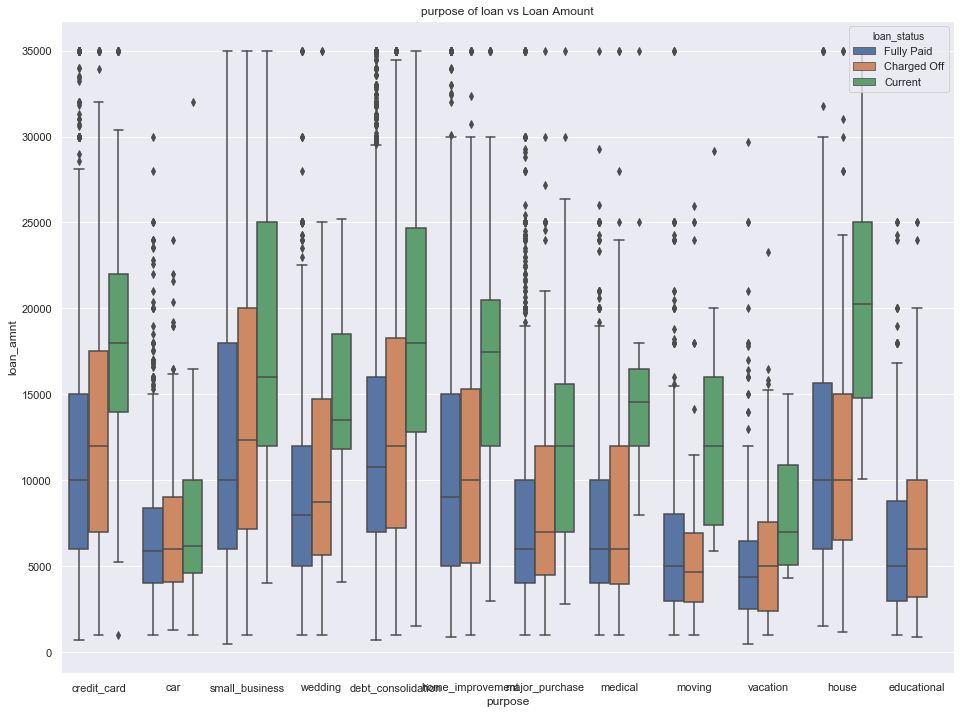

In [89]:
plt.figure(figsize=(16,12))
sns.boxplot(data=loan,x='purpose',y='loan_amnt',hue='loan_status')
plt.title('purpose of loan vs Loan Amount')
plt.show()

In [93]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,loan_income_ratio
loan_amnt,1.0000,0.9811,0.9396,0.3194,0.9272,0.4184,0.0756,-0.0321,0.0062,0.1697,-0.0552,0.3208,0.2522,0.1944,0.1941,0.8828,0.8509,0.8462,0.7269,0.0540,0.1369,0.0736,0.4412,-0.0414,0.6130
funded_amnt,0.9811,1.0000,0.9582,0.3233,0.9540,0.4139,0.0752,-0.0323,0.0071,0.1679,-0.0557,0.3137,0.2458,0.1961,0.1958,0.8995,0.8674,0.8646,0.7348,0.0566,0.1377,0.0756,0.4456,-0.0422,0.6008
funded_amnt_inv,0.9396,0.9582,1.0000,0.3163,0.9026,0.3961,0.0819,-0.0384,-0.0072,0.1549,-0.0555,0.2933,0.2372,0.2044,0.2044,0.8780,0.9101,0.8409,0.7279,0.0357,0.1248,0.0608,0.4365,-0.0455,0.5721
int_rate,0.3194,0.3233,0.3163,1.0000,0.2918,0.0809,0.1149,0.1556,0.1343,0.0144,0.0993,0.1006,-0.0401,0.1347,0.1348,0.3175,0.3122,0.1929,0.5389,0.0971,0.1249,0.0691,0.1600,0.0845,0.2235
installment,0.9272,0.9540,0.9026,0.2918,1.0000,0.4184,0.0625,-0.0193,0.0069,0.1654,-0.0495,0.3160,0.2250,0.1253,0.1251,0.8517,0.8124,0.8448,0.6287,0.0660,0.1190,0.0766,0.3927,-0.0372,0.5486
annual_inc,0.4184,0.4139,0.3961,0.0809,0.4184,1.0000,-0.1256,0.0292,0.0419,0.2492,-0.0221,0.4217,0.3645,0.0590,0.0588,0.3975,0.3823,0.4004,0.2826,0.0204,0.0358,0.0218,0.2168,-0.0210,-0.3198
dti,0.0756,0.0752,0.0819,0.1149,0.0625,-0.1256,1.0000,-0.0371,-0.0013,0.2891,-0.0092,0.2363,0.2302,0.0380,0.0379,0.0750,0.0804,0.0511,0.1139,-0.0113,0.0247,0.0106,0.0111,0.0022,0.1546
delinq_2yrs,-0.0321,-0.0323,-0.0384,0.1556,-0.0193,0.0292,-0.0371,1.0000,0.0081,0.0109,0.0072,-0.0578,0.0632,-0.0021,-0.0024,-0.0227,-0.0294,-0.0394,0.0242,0.0347,0.0120,0.0147,-0.0148,0.0037,-0.0616
inq_last_6mths,0.0062,0.0071,-0.0072,0.1343,0.0069,0.0419,-0.0013,0.0081,1.0000,0.0932,0.0249,-0.0224,0.1134,-0.0105,-0.0101,-0.0130,-0.0222,-0.0272,0.0224,0.0308,0.0210,0.0140,0.0259,0.0158,-0.0297
open_acc,0.1697,0.1679,0.1549,0.0144,0.1654,0.2492,0.2891,0.0109,0.0932,1.0000,0.0030,0.2850,0.6829,0.0269,0.0267,0.1557,0.1455,0.1539,0.1180,-0.0147,0.0165,0.0062,0.0755,0.0078,-0.0458


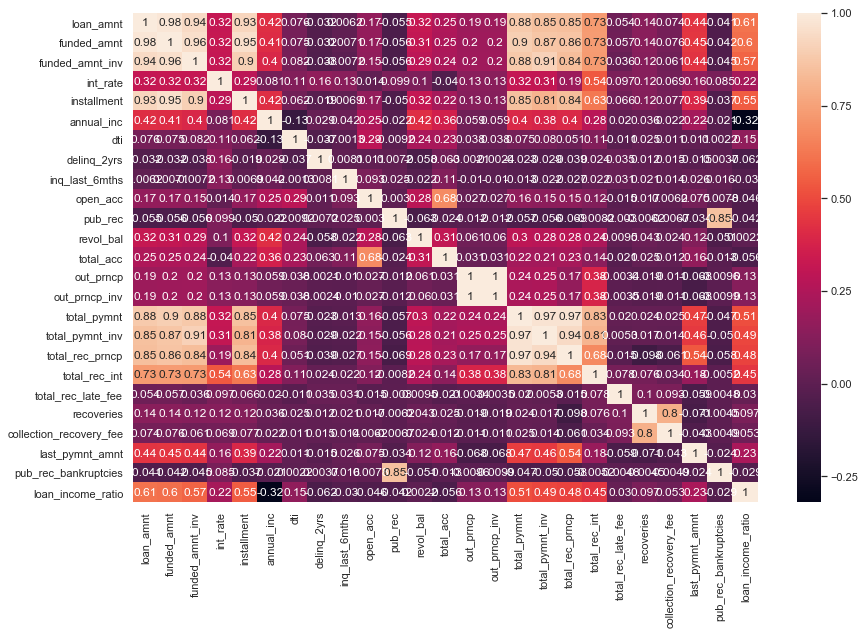

In [99]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [100]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

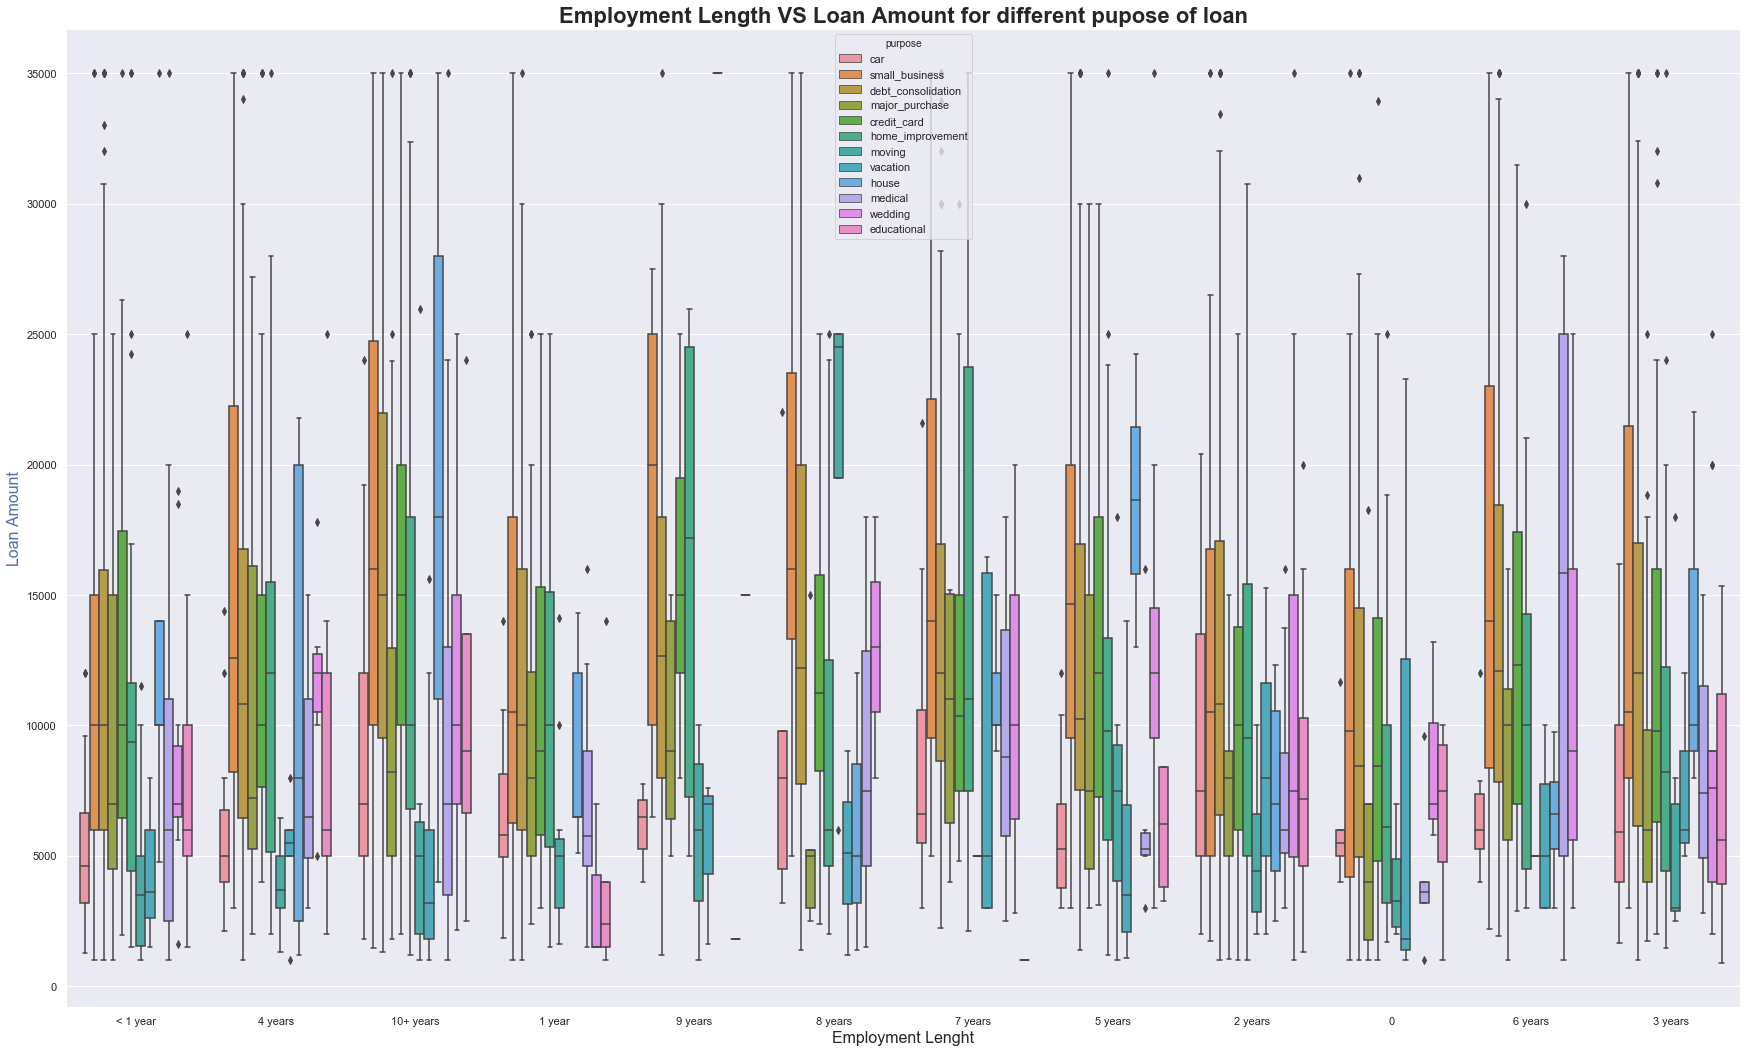

In [102]:
ax= plt.figure(figsize=(30,18))
ax= sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length VS Loan Amount for different pupose of loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Lenght',fontsize=16)
ax.set_ylabel('Loan Amount',color ='b',fontsize=16)
plt.show()

In [103]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [104]:
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [105]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states <10)]
loan_filter_states = loan.drop(labels =loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,254,53,1343,1650,0.1540
NM,30,4,140,174,0.1720
NV,90,15,330,435,0.2070
NY,428,95,2801,3324,0.1290
OH,138,41,928,1107,0.1250
OK,35,11,218,264,0.1330
OR,68,14,330,412,0.1650
PA,157,49,1131,1337,0.1170
RI,24,4,142,170,0.1410


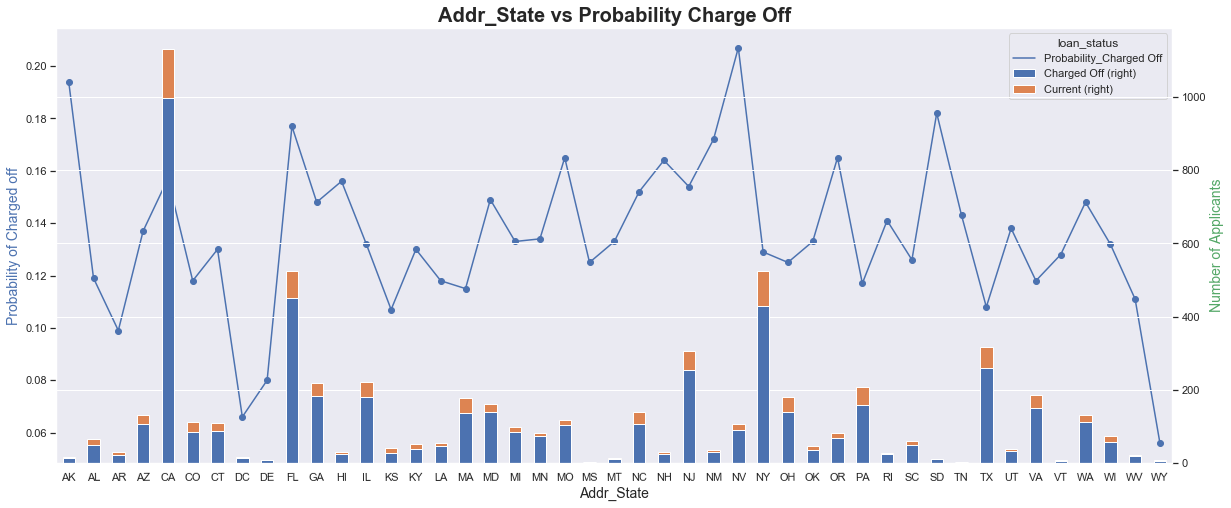

In [109]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))
bivariate_prob(df = loan_filter_states,col ='addr_state')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,159,50,1336,1545,0.1030
credit_card,539,103,4457,5099,0.1060
debt_consolidation,2753,585,15181,18519,0.1490
educational,56,0,265,321,0.1740
home_improvement,340,99,2479,2918,0.1170
house,59,14,301,374,0.1580
major_purchase,220,37,1912,2169,0.1010
medical,106,12,568,686,0.1550
moving,90,7,480,577,0.1560


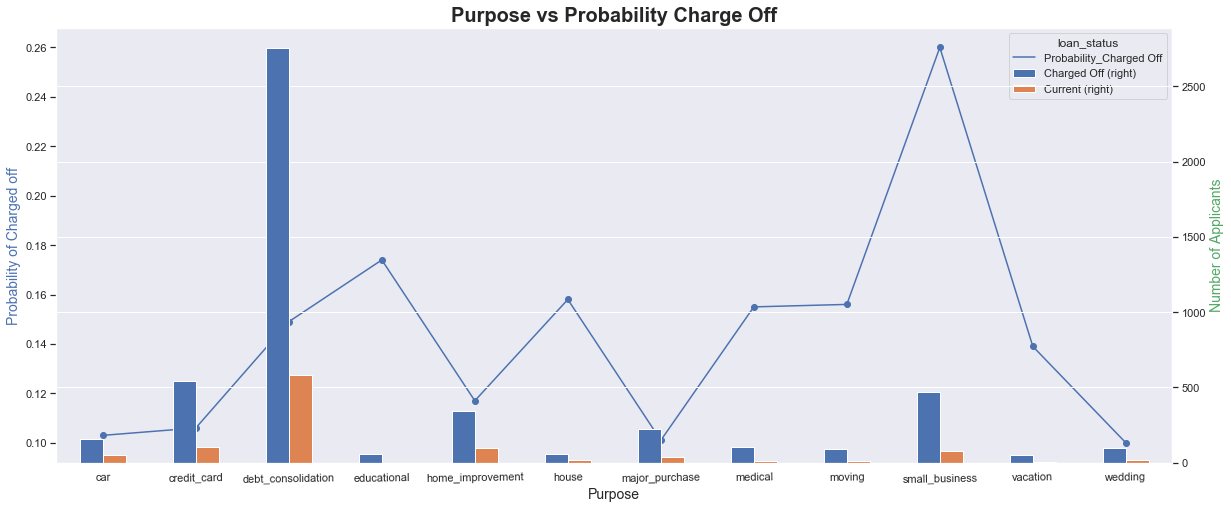

In [111]:
purpose = crosstab(loan,'purpose')
display(purpose)
bivariate_prob(df=loan,col='purpose',stacked=False)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,512,31,8369,8912,0.0570
B,1244,303,9144,10691,0.1160
C,1167,240,5762,7169,0.1630
D,987,195,3567,4749,0.2080
E,645,161,1771,2577,0.2500
F,294,63,593,950,0.3090
G,89,14,181,284,0.3130


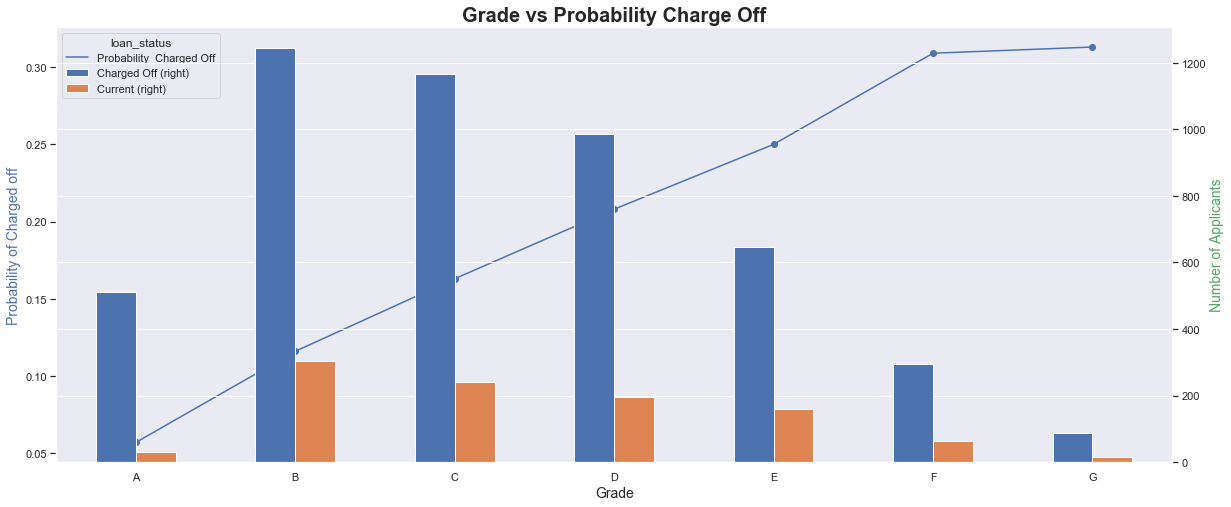

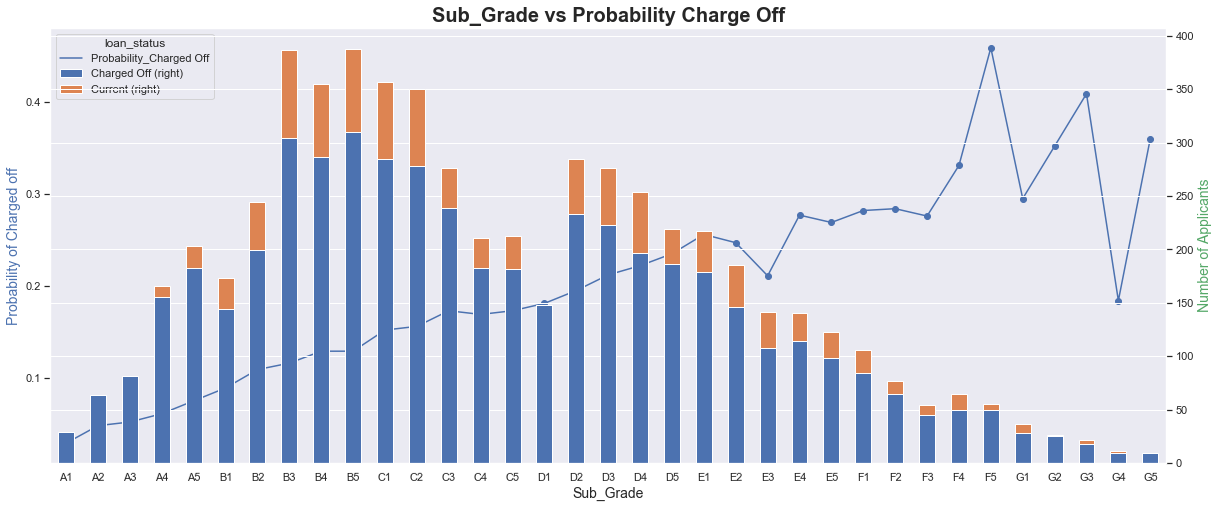

In [116]:
grade =crosstab(loan,'grade')
display(grade)
bivariate_prob(df =loan,col='grade',stacked=False)
bivariate_prob(df =loan,col='sub_grade')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,386,19,1705,2110,0.1830
25000-50000,1864,285,9531,11680,0.1600
50000-75000,1523,326,9036,10885,0.1400
75000-100000,669,198,4816,4974,0.1340
10000 and above,496,179,4299,5683,0.0870


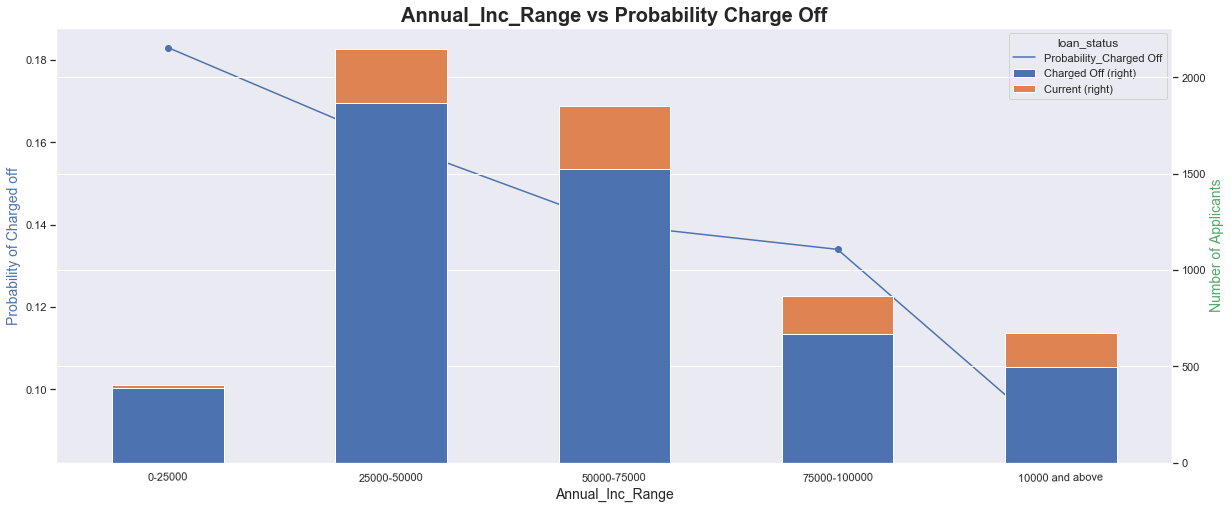

In [117]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)
bivariate_prob(df=loan,col='annual_inc_range')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,265,5,5221,6859,0.0390
7.5-10,444,59,5045,8787,0.0510
10-12.5,1117,238,7432,5491,0.2030
12.5-15,1264,231,6377,7872,0.1610
15 and above,1582,387,4890,5548,0.2850


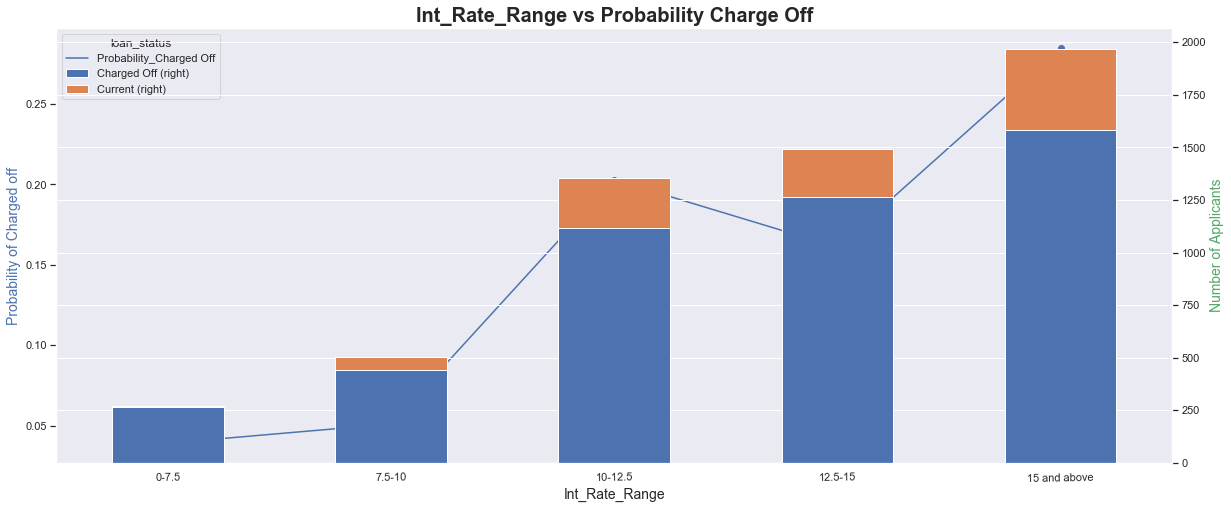

In [122]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df=loan,col='int_rate_range')

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,189,34,681,904,0.2090
1 year,395,65,2378,2838,0.1390
10+ years,1171,359,6377,7907,0.1480
2 years,485,88,3330,3903,0.1240
3 years,485,67,3111,3663,0.1320
4 years,403,83,2601,3087,0.1310
5 years,413,77,2456,2946,0.1400
6 years,276,53,1693,2022,0.1360
7 years,232,54,1297,1583,0.1470


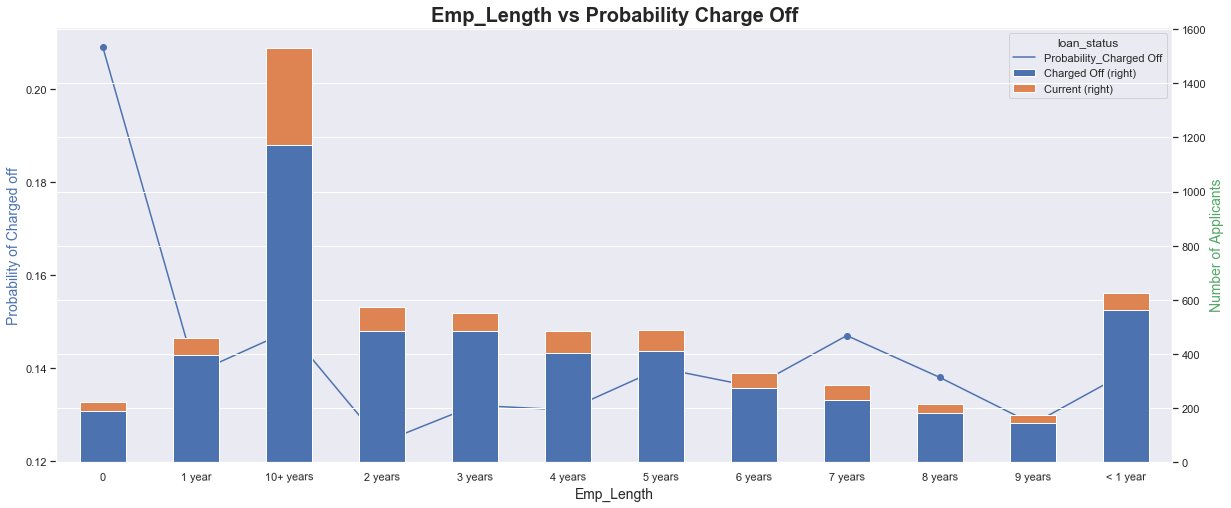

In [119]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)
bivariate_prob(df=loan,col='emp_length')